#확률적 경사 하강법(Stochastic Gradient Descent)
---
기존의 훈련 데이터를 버리지 않고 새로운 데이터에 대해서만 조금씩 추가로 훈련하는 방식을 **점진적 학습**이라고 한다. 확률적 경사 하강법은 대표적인 점진적 학습 알고리즘이다.
확률적 경사 하강법에서 '확률적'이라는 말은 '무작위하게' or '랜덤하게'의 기술적인 표현이다. '경사 하강법'이라는 말은 경사를 따라 내려가는 방법이다. '가장 빠른 길 = 가장 가파른 길'이므로 가장 가파른 길을 찾아 '조금씩' 내려오는 과정이 경사 하강법 모델을 훈련하는 방법이다.
훈련 세트를 사용하여 가장 가파른 길을 찾을 때, 전체 샘플을 사용하지 않고 딱 하나의 샘플을 랜덤으로 골라서 사용하기 때문에 '확률적'이라는 말이 붙는다.

조금 더 자세하게 설명하면, 확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다. 그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다. 이런 식으로 전체 샘플을 모두 사용할 때까지 계속한다. 모든 샘플을 다 사용했는데도 산을 다 내려오지 못했으면 다시 처음부터, 훈련 세트에 모든 샘플을 다시 채워 넣는다. 랜덤하게 샘플을 골라 경사를 내려가는 행위를 만족할만한 위치에 도달할 때까지 반복한다. 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 **에포크(epoch)**라고 부른다.

1개의 샘플이 아니라 무작위로 몇 개의 샘플을 선택해서 경사 하강법을 수행하는 방식을 **미니배치 경사 하강법(minibatch gradient descent)**라고 한다.
극단적으로 한 번 이동하기 위해 전체 샘플을 사용하는 경우를 **배치 경사 하강법(batch gradient descent)**라고 한다. 모든 데이터를 사용하기 때문에 가장 안정적인 방법이 될 수 있지만 그만큼 컴퓨터 자원을 많이 사용하게 된다.

#손실 함수(Loss Function)
---
손실 함수는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다. 따라서 손실 함수의 값이 작을수록 좋지만, 어떤 값이 최솟값인지를 알지 못한다. 따라서 이 최솟값을 찾기 위해 확률적 경사 하강법을 사용한다.
비용 함수(cost function)은 손실 함수의 다른 말이다. 엄밀히 따지면, 손실 함수는 샘플 하나에 대한 손실을 정의하고 비용 함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 의미한다. (분류에서 손실은 아주 확실하다. 정답을 맞히지 못하는 것.)

경사 하강법을 사용하면 '조금씩' 내려와야 하기 때문에 손실 함수는 미분 가능해야 한다. 어떻게 연속적인 손실 함수를 만들 수 있을까?


#로지스틱 손실 함수
---
로지스틱 회귀에서 로지스틱 회귀 모델이 확률을 출력하는 것을 살펴보았다. 각 샘플의 예측 확률을 사용하여, 양성 클래스(target = 1)의 경우 -log(예측확률), 음성 클래스(target = 0)의 경우 -log(1 - 예측확률)로 손실을 계산한다. 양성 클래스의 경우 확률이 1에서 멀어질수록 손실을 아주 큰 양수가 되고, 음성 클래스의 경우 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 된다. 이렇게 정의한 손실 함수를 **로지스틱 손실 함수(logistic loss function)** 또는 **이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)**이라고 부른다.

이진 분류 뿐만 아니라 다중 분류도 비슷한 손실 함수를 사용한다. 다중 분류에서 사용하는 손실 함수를 **크로스엔트로피 손실 함수(cross-entropy loss function)**이라고 부른다. 대부분의 경우, 이미 문제에 잘 맞는 손실 함수가 개발되어 있기 때문에 우리가 직접 손실 함수를 만드는 일은 없다.
(회귀에는 평균 절댓값 오차 혹은 평균 제곱 오차를 손실 함수로 사용할 수 있다. 타깃에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균한 값이 작을수록 좋은 모델이다.)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42) # 훈련 세트 - 테스트 세트로 나누기

ss = StandardScaler() # 표준화 전처리
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42) # loss로 손실 함수의 종류와 max_iter로 수행할 에포크 횟수를 지정한다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.773109243697479 0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [8]:
sc.partial_fit(train_scaled, train_target) # 모델을 이어서 훈련, 메서드를 호출할 때마다 1 에포크씩 이어서 훈련 가능
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.8151260504201681 0.825


#에포크와 과대/과소 적합
---
확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다. 에포크가 진행될수록 훈련 세트 점수는 꾸준히 증가하지만, 테스트 세트 점수는 어느 순간 감소하기 시작한다. 이 지점이 모델이 과대적합되기 시작하는 곳이고, 이 지점이 시작하기 전에 훈련을 멈추는 것을 조기 종료(early stopping)이라고 한다.


In [9]:
import numpy as np

sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300): # 300번의 에포크 동안 훈련을 반복한다. 반복마다 훈련 - 테스트 세트의 점수를 계산하여 train, test_sore 리스트에 추가한다.
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

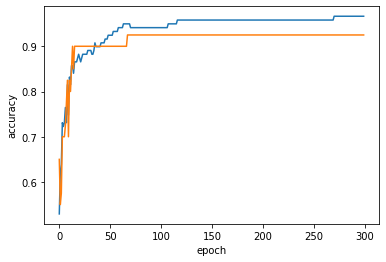

In [12]:
import matplotlib.pyplot as plt

plt.plot(train_score) # 훈련 세트 그래프 - 파랑
plt.plot(test_score) # 테스트 세트 그래프 - 주황
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show() # 100번째 에포크가 적절한 반복 횟수임을 확인할 수 있다.

In [15]:
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42) # tol 매개변수에서 향상될 최솟값을 설정해 일정 에포크 동안 성능이 향상되지 않으면 자동으로 멈추게 한다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.957983193277311 0.925


위 코드에서는 loss 매개변수로 log를 사용했지만 기본값은 'hinge'이다. **힌지 손실(hinge loss)**은 **서포트 벡터 머신(support vector machine)**이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다.